# Libraries

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_letters
from scipy.stats import ttest_1samp
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import math
%matplotlib inline

# Data

In [465]:
data_warm = data[data['warm/cold'] == 'warm']
data_cold = data[data['warm/cold'] == 'cold']
data.head(5)

AvgTemperature  suicides/100k pop  HDI for year  \
country year                                                    
Albania 1997       22.185990              77.43           NaN   
        1998       16.451389              66.52           NaN   
        1999       17.287201              69.81           NaN   
        2000       17.320525              30.70         0.656   
        2001       16.242000              50.62           NaN   

              gdp_per_capita ($)  military_exp warm/cold  
country year                                              
Albania 1997               793.0      5.972268      warm  
        1998               899.0      2.642012      cold  
        1999              1127.0     17.334692      cold  
        2000              1299.0      6.392603      cold  
        2001              1451.0      4.524354      cold

# Correlation

In [466]:
data.corr(method= 'spearman')['AvgTemperature']

AvgTemperature        1.000000
suicides/100k pop    -0.605077
HDI for year         -0.450042
gdp_per_capita ($)   -0.288717
military_exp         -0.072071
Name: AvgTemperature, dtype: float64

In [467]:
data_warm.corr(method= 'spearman')['AvgTemperature']

AvgTemperature        1.000000
suicides/100k pop     0.235708
HDI for year          0.160346
gdp_per_capita ($)   -0.078933
military_exp          0.011894
Name: AvgTemperature, dtype: float64

In [468]:
data_cold.corr(method= 'spearman')['AvgTemperature']

AvgTemperature        1.000000
suicides/100k pop    -0.398803
HDI for year         -0.313354
gdp_per_capita ($)   -0.213703
military_exp         -0.171529
Name: AvgTemperature, dtype: float64

### Temperature on Suicides

In [469]:
data.corr(method= 'spearman')['AvgTemperature']['suicides/100k pop']

-0.6050769184884749

<AxesSubplot:xlabel='AvgTemperature', ylabel='suicides/100k pop'>

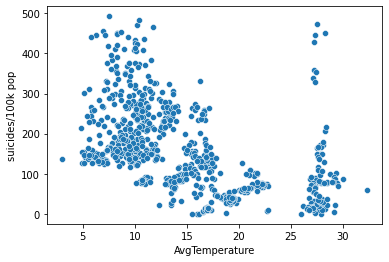

In [470]:
sns.scatterplot(data = data, x = 'AvgTemperature', y = 'suicides/100k pop', )

<AxesSubplot:xlabel='AvgTemperature', ylabel='suicides/100k pop'>

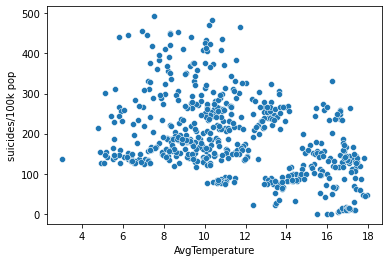

In [471]:
sns.scatterplot(data = data_cold, x = 'AvgTemperature', y = 'suicides/100k pop', )

<AxesSubplot:xlabel='AvgTemperature', ylabel='suicides/100k pop'>

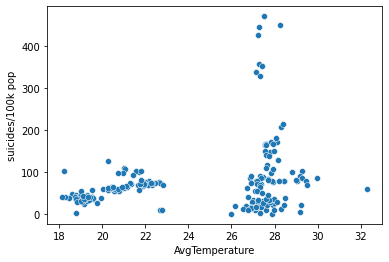

In [472]:
sns.scatterplot(data = data_warm, x = 'AvgTemperature', y = 'suicides/100k pop', )

### Temperature on GDP per Capita

In [473]:
data.corr(method= 'spearman')['AvgTemperature']['gdp_per_capita ($)']

-0.2887166591260987

<AxesSubplot:xlabel='AvgTemperature', ylabel='gdp_per_capita ($)'>

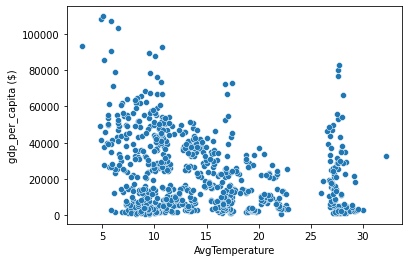

In [474]:
sns.scatterplot(data = data, x = 'AvgTemperature', y = 'gdp_per_capita ($)')

<AxesSubplot:xlabel='AvgTemperature', ylabel='gdp_per_capita ($)'>

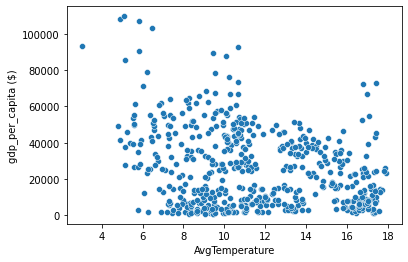

In [475]:
sns.scatterplot(data = data_cold, x = 'AvgTemperature', y = 'gdp_per_capita ($)')

<AxesSubplot:xlabel='AvgTemperature', ylabel='gdp_per_capita ($)'>

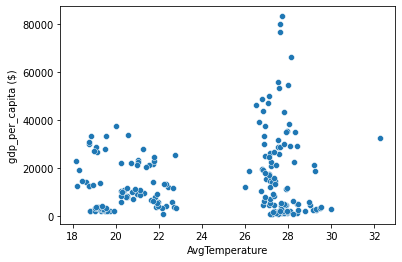

In [476]:
sns.scatterplot(data = data_warm, x = 'AvgTemperature', y = 'gdp_per_capita ($)')

### Temperature on Human Development Index

In [477]:
data.corr(method= 'spearman')['AvgTemperature']['HDI for year']

-0.45004207560391235

<AxesSubplot:xlabel='AvgTemperature', ylabel='HDI for year'>

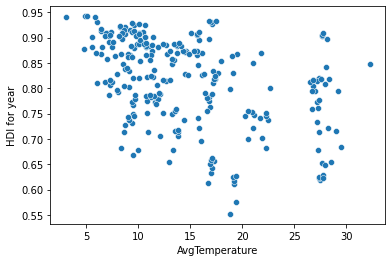

In [478]:
sns.scatterplot(data = data, x = 'AvgTemperature', y = 'HDI for year')

<AxesSubplot:xlabel='AvgTemperature', ylabel='HDI for year'>

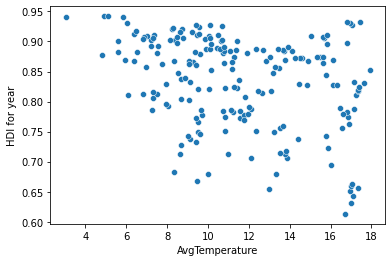

In [479]:
sns.scatterplot(data = data_cold, x = 'AvgTemperature', y = 'HDI for year')

<AxesSubplot:xlabel='AvgTemperature', ylabel='HDI for year'>

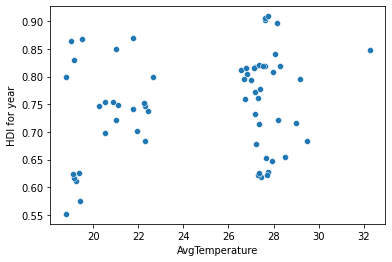

In [480]:
sns.scatterplot(data = data_warm, x = 'AvgTemperature', y = 'HDI for year')

### Temperature on Military Expenses (as % of GDP)

In [481]:
data.corr(method= 'spearman')['AvgTemperature']['military_exp']

-0.07207063900996148

<AxesSubplot:xlabel='AvgTemperature', ylabel='military_exp'>

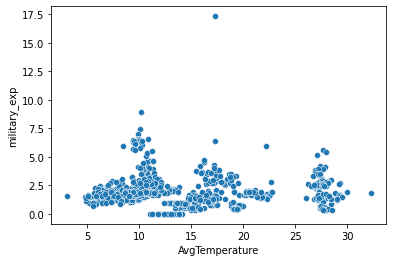

In [482]:
sns.scatterplot(data = data, x = 'AvgTemperature', y = 'military_exp')

<AxesSubplot:xlabel='AvgTemperature', ylabel='military_exp'>

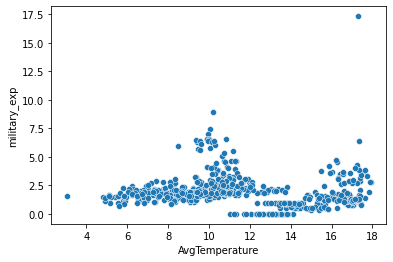

In [483]:
sns.scatterplot(data = data_cold, x = 'AvgTemperature', y = 'military_exp')

<AxesSubplot:xlabel='AvgTemperature', ylabel='military_exp'>

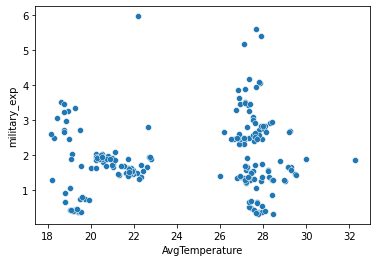

In [484]:
sns.scatterplot(data = data_warm, x = 'AvgTemperature', y = 'military_exp')

# Mann Whitney U Test

### Temperature on Suicides (per 100K)

In [485]:
# H0 : Suicide rate in both samples are the same
# H1 : Suicide rate in samples is not the same
# alpha = 0.05

# Group 1: All 'warm' countries
# = data_warm

# Group 2: All 'cold' countries
# = data_cold

# Mann Whitney U Test
mannwhitneyu(x = data_warm['suicides/100k pop'], y = data_cold['suicides/100k pop'],
             alternative = 'two-sided', use_continuity = False)

MannwhitneyuResult(statistic=14899.0, pvalue=9.684142476284347e-51)

In [486]:
# Reject H0, difference between groups is different. 

Text(0.5, 1.0, 'COLD')

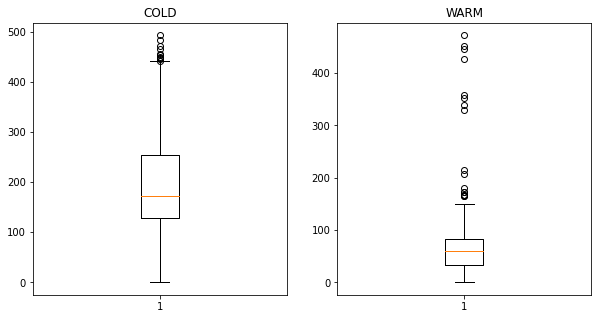

In [487]:
# Boxplot of the two groups

fig1, axes1 = plt.subplots(1, 2, figsize = (10, 5))

axes1[1].boxplot(data_warm['suicides/100k pop'])
axes1[1].set_title("WARM")

axes1[0].boxplot(data_cold['suicides/100k pop'])
axes1[0].set_title("COLD")

### Temperature on GDP per Capita (in $)

In [488]:
# H0 : GDP per capita in both samples are the same
# H1 : GDP per capita in samples is not the same
# alpha = 0.05

# Group 1: All 'warm' countries
# = data_warm

# Group 2: All 'cold' countries
# = data_cold

# Mann Whitney U Test
mannwhitneyu(x = data_warm['gdp_per_capita ($)'], y = data_cold['gdp_per_capita ($)'],
             alternative = 'two-sided', use_continuity = False)

MannwhitneyuResult(statistic=37129.5, pvalue=1.7136363105261424e-10)

In [489]:
# Reject H0, difference between groups is different. 

Text(0.5, 1.0, 'COLD')

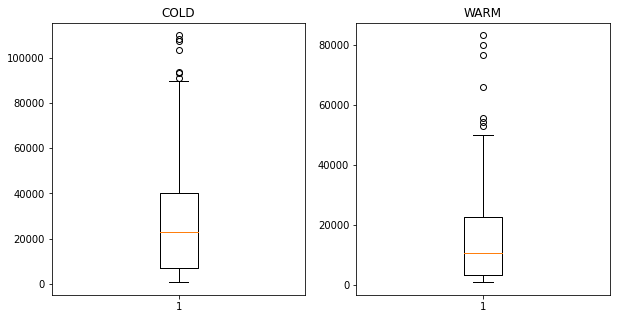

In [490]:
# Boxplot of the two groups

fig2, axes2 = plt.subplots(1, 2, figsize = (10, 5))

axes2[1].boxplot(data_warm['gdp_per_capita ($)'])
axes2[1].set_title("WARM")

axes2[0].boxplot(data_cold['gdp_per_capita ($)'])
axes2[0].set_title("COLD")

### Temperature on Military Expenses (as % of GDP)

In [491]:
# H0 : Military expenses in both samples are the same
# H1 : Military expenses in samples is not the same
# alpha = 0.05

# Group 1: All 'warm' countries
# = data_warm

# Group 2: All 'cold' countries
# = data_cold

# Mann Whitney U Test
mannwhitneyu(x = data_warm['military_exp'], y = data_cold['military_exp'],
             alternative = 'two-sided', use_continuity = False)

MannwhitneyuResult(statistic=55317.0, pvalue=0.5168924101168829)

In [492]:
# Still assume H0, difference between groups is not significantly different. 

Text(0.5, 1.0, 'COLD')

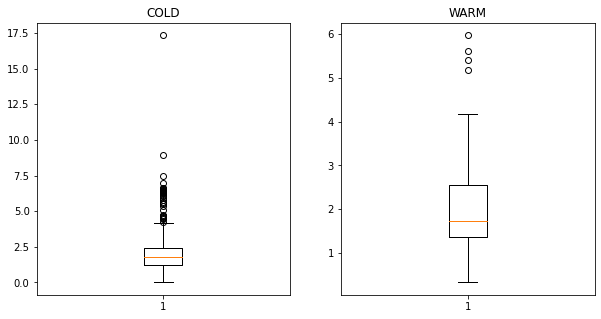

In [493]:
# Boxplot of the two groups

fig3, axes3 = plt.subplots(1, 2, figsize = (10, 5))

axes3[1].boxplot(data_warm['military_exp'])
axes3[1].set_title("WARM")

axes3[0].boxplot(data_cold['military_exp'])
axes3[0].set_title("COLD")

### Temperature on Human Development Index

In [494]:
# H0 : HDI in both samples are the same
# H1 : HDI in samples is not the same
# alpha = 0.05

# Group 1: All 'warm' countries
# = data_warm

# Group 2: All 'cold' countries
# = data_cold

# Mann Whitney U Test
mannwhitneyu(x = data_warm['HDI for year'], y = data_cold['HDI for year'],
             alternative = 'two-sided', use_continuity = False)

MannwhitneyuResult(statistic=54901.0, pvalue=0.6260846538760811)

In [495]:
# Still assume H0, difference between groups is not significantly different.

Text(0.5, 1.0, 'COLD')

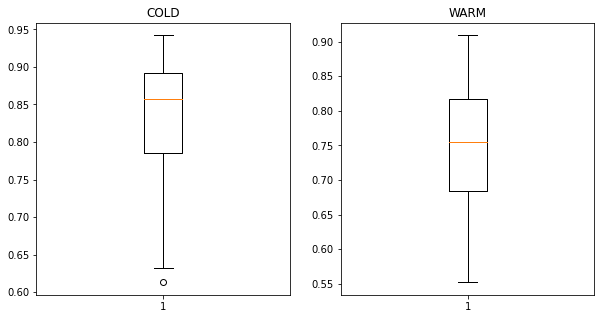

In [496]:
# Boxplot of the two groups

fig4, axes4 = plt.subplots(1, 2, figsize = (10, 5))

axes4[1].boxplot(data_warm['HDI for year'].dropna())
axes4[1].set_title("WARM")

axes4[0].boxplot(data_cold['HDI for year'].dropna())
axes4[0].set_title("COLD")